C:\Users\edwar\AppData\Local\Temp\ipykernel_19088\1905610120.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  cluster_df = pd.read_sql(query_cluster, conn)


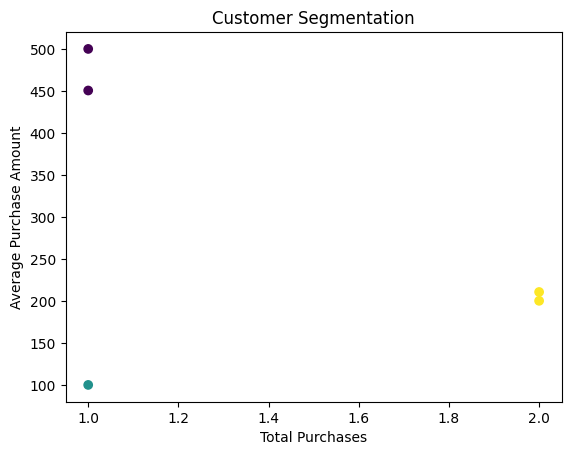

In [3]:
import pandas as pd
import mysql.connector
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

conn=mysql.connector.connect(
    host="localhost",
    port="3306",
    user="root",
    password="password",
    database="ML"
)

query_cluster="SELECT * FROM CustomerFeatures"
cluster_df=pd.read_sql(query_cluster,conn)

conn.close()

X=cluster_df[['TotalPurchases','AvgPurchaseAmount']]

kmeans=KMeans(n_clusters=3,random_state=0).fit(X)
cluster_df['Cluster']=kmeans.labels_

plt.scatter(cluster_df['TotalPurchases'],
            cluster_df['AvgPurchaseAmount'],
            c=cluster_df['Cluster'])
plt.xlabel('Total Purchases')
plt.ylabel('Average Purchase Amount')
plt.title('Customer Segmentation')
plt.show()